Signal period      =  0.1 sec
Sampling timeStep  =  0.0125 sec
Sampling frequency =  80.0 Hz (sampling theorem implies that all FFT spectrum above f_s/2 is spurious)
Meaning: you need at least 2 porints per full period to sample the signal
Points per period  =  8.0


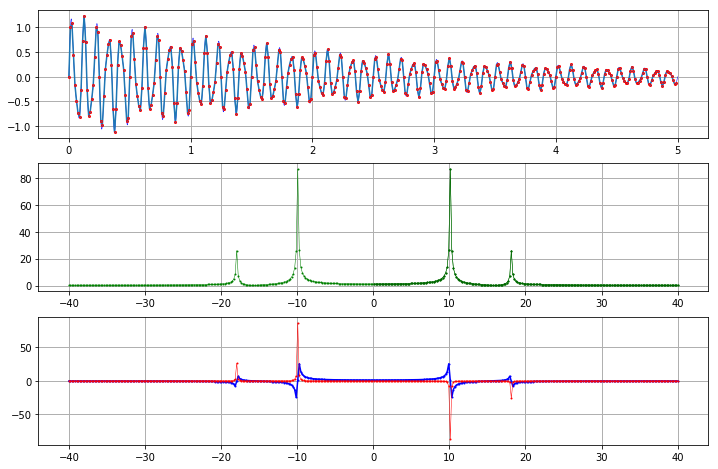

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.fftpack as fp

def generateSignal(t_n=5.0, omega=2*np.pi*10.0, samplingPoints=100, phase=np.pi*0.0):
    # generate smoothSignal -> N very large
    N = 100*1000
    t_values = np.linspace(0.0, t_n, N)
    signal   = (np.sin(omega*t_values+phase) + 0.3*np.sin(1.8*omega*t_values+phase)   )*np.exp(-0.4*t_values)

    # select sampled signal points
    sampler = N//samplingPoints
    sampleTimes   = t_values[::sampler]
    sampledSignal = signal[::sampler]
    samplingTimeStep = t_n/samplingPoints
    f_sampling = 1.0/samplingTimeStep
    print('Signal period      = ',2*np.pi/omega,'sec')
    print('Sampling timeStep  = ',samplingTimeStep,'sec')
    print('Sampling frequency = ',f_sampling,'Hz (sampling theorem implies that all FFT spectrum above f_s/2 is spurious)')
    print('Meaning: you need at least 2 porints per full period to sample the signal')
    print('Points per period  = ', 2*np.pi/omega/samplingTimeStep )
    
    return t_values, signal, sampleTimes, sampledSignal, f_sampling
    
def get_fft_values(y_values, f_sampling):
    T = 1.0
    N = len(y_values)
    #f_values = np.linspace(0.0, f_sampling, N)
    fft_valuesRaw0 = fp.fft(y_values)
    f_values       = np.linspace(-f_sampling/2, f_sampling/2, N)
    fft_valuesRaw  = fp.fftshift(fft_valuesRaw0)
    fft_valuesRe   = np.real(fft_valuesRaw)
    fft_valuesIm   = np.imag(fft_valuesRaw)
    fft_valuesAbs  = np.abs(fft_valuesRaw)
    return f_values, fft_valuesRe, fft_valuesIm, fft_valuesAbs


t_values, signal, sampleTimes, sampledSignal, f_sampling = generateSignal(samplingPoints=400)


freqGrid, spectrumRe, spectrumIm, spectrumAbs = get_fft_values(sampledSignal, f_sampling)

fig = plt.figure(figsize = (12,8))
ax1 = plt.subplot(3,1,1)
ax1.plot(t_values, signal, color='blue', linewidth=0.5)
ax1.plot(sampleTimes, sampledSignal, markersize=2, markeredgecolor = 'red',marker='o')
ax1.grid(True,linewidth=1)

ax2 = plt.subplot(3,1,2)
ax2.plot(freqGrid, spectrumAbs, color='green', linewidth=0.5, markersize=1, markeredgecolor = 'green',marker='o')
ax2.plot(freqGrid[-len(freqGrid)//2:], spectrumAbs[-len(spectrumAbs)//2:], color='darkgreen', linewidth=0.5, markersize=1, markeredgecolor = 'darkgreen',marker='o')
ax2.grid(True,linewidth=1)

ax3 = plt.subplot(3,1,3)
ax3.plot(freqGrid, spectrumRe,  color='blue',   linewidth=1.5, markersize=1, markeredgecolor = 'blue',  marker='o')
ax3.plot(freqGrid, spectrumIm,  color='red' ,   linewidth=0.5, markersize=1, markeredgecolor = 'red',   marker='o')
ax3.grid(True,linewidth=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


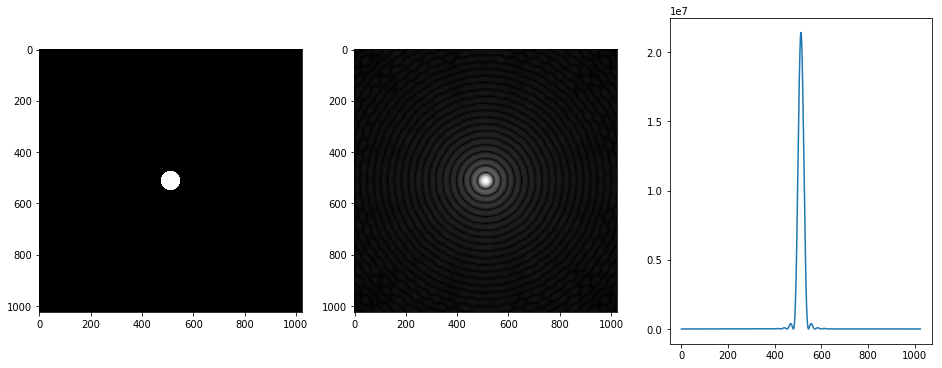

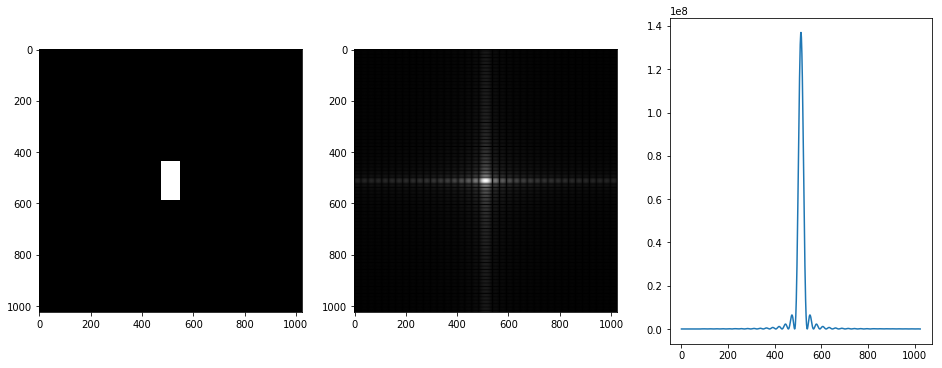

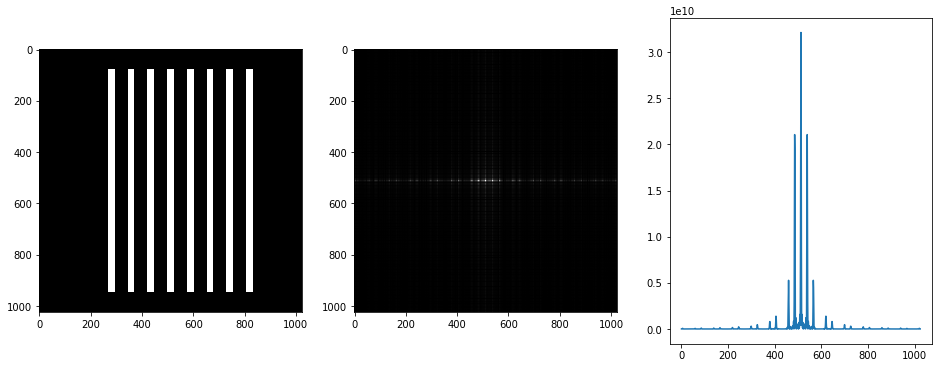

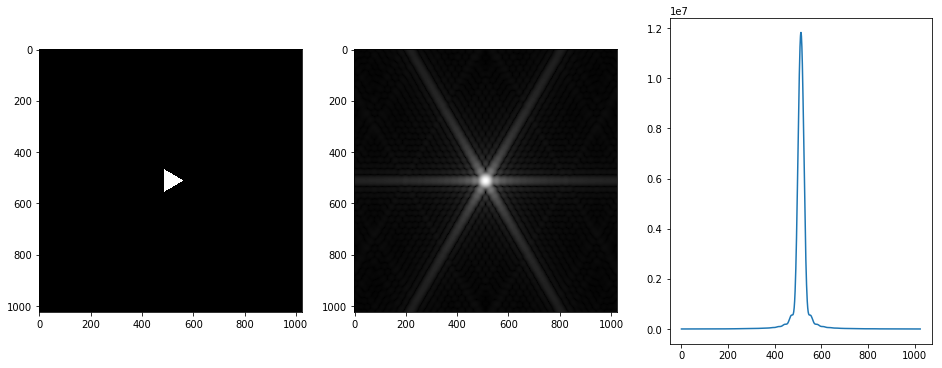

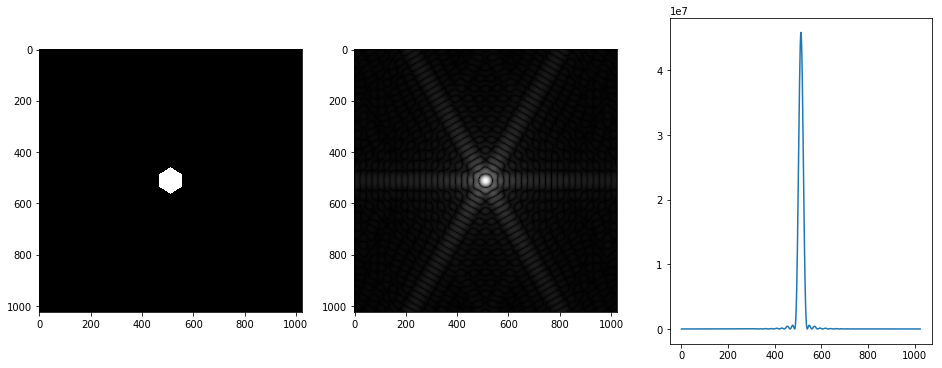

In [2]:
scale = 0.075

def picHole(xv, yv):
    holeSize = scale
    alpha    = 450
    r2   = np.sqrt(np.square(xv)+np.square(yv))
    func = 1.0/(1.0+np.exp(alpha*(r2-holeSize)))
    func = np.heaviside(-r2+holeSize/2,0.5)
    return func

def picSquare(xv, yv):
    dx = scale
    dy = dx*2.0
    func = np.heaviside(xv+dx/2,0.5)*np.heaviside(-xv+dx/2,0.5) * np.heaviside(yv+dy/2,0.5)*np.heaviside(-yv+dy/2,0.5)
    return func

def picLattice(xv, yv):
    DX = scale
    dx = DX/3.0
    dy = 0.85
    func = [np.heaviside((xv+i*DX)+dx/2,0.5)*np.heaviside(-(xv+i*DX)+dx/2,0.5) for i in range(-4,4,1)]
    func = sum(func)
    func = func*np.heaviside(yv+dy/2,0.5)*np.heaviside(-yv+dy/2,0.5)
    return func

def picTriangle(xv, yv):
    dx    = scale/3.0
    n     = 3
    angle = 360.0/n
    func  = 1.0
    for k in range(n):
        func = func * np.heaviside(np.sin(k*angle/180.0*np.pi)*yv + np.cos(k*angle/180.0*np.pi)*xv + dx,0.5)
    return func

def picHexagon(xv, yv):
    dx    = scale/np.sqrt(3.0)
    n     = 6
    angle = 360.0/n
    func  = 1.0
    for k in range(n):
        func = func * np.heaviside(np.sin(k*angle/180.0*np.pi)*yv + np.cos(k*angle/180.0*np.pi)*xv + dx,0.5)
    return func

def generate2dPic(res=512, picName = 'hole'):
    L      = 2
    nx, ny = (res, res)
    x      = np.linspace(-L/2, L/2, nx)
    y      = np.linspace(-L/2, L/2, ny)
    xv, yv = np.meshgrid(x, y)

    if picName == 'hole':
        return picHole(xv, yv)
    if picName == 'square':
        return picSquare(xv, yv)
    if picName == 'lattice':
        return picLattice(xv, yv)
    if picName == 'triangle':
        return picTriangle(xv, yv)
    if picName == 'hexagon':
        return picHexagon(xv, yv)
    

def get_fft2d_values(y_values, f_sampling=1.0):
    fft_valuesRaw0 = fp.fft2(y_values)
    fft_valuesRaw1 = fp.fftshift(fft_valuesRaw0)
    #resize in and output pics
    resOut         = res//2
    resDiff2       = (res-resOut)//2
    fft_valuesRaw  = fft_valuesRaw1[resDiff2:res-resDiff2,resDiff2:res-resDiff2]
    y_values       = y_values[resDiff2:res-resDiff2,resDiff2:res-resDiff2]
    fft_valuesRe   = np.real(fft_valuesRaw)
    fft_valuesIm   = np.imag(fft_valuesRaw)
    # **2.0 is to calculate the intensity - the log is to make it look realistic
    #fft_valuesAbs  = np.log(np.abs(fft_valuesRaw)**2.0)
    fft_valuesAbs  = np.abs(fft_valuesRaw)
    return y_values, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut


res = 2048#512
pic, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut = get_fft2d_values(generate2dPic(res,'hole'))
fig = plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,3,1)
ax1.imshow(pic,cmap='gray')
ax2 = plt.subplot(1,3,2)
ax2.imshow(fft_valuesAbs**0.5,cmap='gray')
ax3 = plt.subplot(1,3,3)
ax3.plot(fft_valuesAbs[resOut//2]**2)

pic, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut = get_fft2d_values(generate2dPic(res,'square'))
fig2 = plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,3,1)
ax1.imshow(pic,cmap='gray')
ax2 = plt.subplot(1,3,2)
ax2.imshow(fft_valuesAbs**0.5,cmap='gray')
ax3 = plt.subplot(1,3,3)
ax3.plot(fft_valuesAbs[resOut//2]**2)

pic, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut = get_fft2d_values(generate2dPic(res,'lattice'))
fig3 = plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,3,1)
ax1.imshow(pic,cmap='gray')
ax2 = plt.subplot(1,3,2)
ax2.imshow(fft_valuesAbs**0.5,cmap='gray')
ax3 = plt.subplot(1,3,3)
ax3.plot(fft_valuesAbs[resOut//2]**2)

pic, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut = get_fft2d_values(generate2dPic(res,'triangle'))
fig4 = plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,3,1)
ax1.imshow(pic,cmap='gray')
ax2 = plt.subplot(1,3,2)
ax2.imshow(fft_valuesAbs**0.5,cmap='gray')
ax3 = plt.subplot(1,3,3)
ax3.plot(fft_valuesAbs[resOut//2]**2)

pic, fft_valuesRe, fft_valuesIm, fft_valuesAbs, resOut = get_fft2d_values(generate2dPic(res,'hexagon'))
fig5 = plt.figure(figsize = (16,6))
ax1 = plt.subplot(1,3,1)
ax1.imshow(pic,cmap='gray')
ax2 = plt.subplot(1,3,2)
ax2.imshow(fft_valuesAbs**0.5,cmap='gray')
ax3 = plt.subplot(1,3,3)
ax3.plot(fft_valuesAbs[resOut//2]**2)